In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #plot를 그리기 위해 import
import seaborn as sns

import os
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#python = 3.11.5
#os = window

# 1. 데이터 불러오기

In [4]:
#read_csv(경로, encoding방식) : pandas의 내장함수, cp949방식으로 인코딩된 경로상의 csv파일을 dataFrame형태로 리턴함 
#폴더 내의 경로, 이름 변경시 수정 필요
df = pd.read_csv('./2_데이터셋/1_Raw_데이터/sokcho.csv',encoding='cp949')

In [5]:
raw_data = df.copy()    #dataFrame형의 내장함수, 그대로 복사해서 리턴함. 해당 줄에서는 원본 데이터의 훼손을 막기 위해 사용

#pandas의 내장함수, 날짜 문자열을 datetime형식으로 변환. 이때 날짜 문자열의 형식이 format과 일치해야함. 원본데이터의 예로 Jan-86은 각각 약어로 된 월 이름을 나타내는 %b와 연도를 나타내는 %y와 일치 따라서 format을 %b-%y로 표기
raw_data['일시'] = pd.to_datetime(raw_data['일시'], format='%b-%y') 

#dataFrame의 내장함수, 열을 데이터프레임의 행 인덱스로 변환. 해당 줄에서는 날짜를 나타내는 '일시'열을 데이터프레임의 행 인덱스로 변환하기 위해 사용
raw_data.set_index('일시', inplace=True)

#.columns[:] : 지정한 범위의 column의 이름들을 반환. 해당 줄에서는 '지점', '지점명' 열들을 삭제하기 위해 사용함.
raw_data = raw_data[raw_data.columns[2:]]

#평균기온, 평균상대습도, 월합강수량, spi-3(표준강수지수) 열들의 이름을 아래 이름으로 변경
raw_data.columns = ['AVG_TEMP', 'AVG_RH', 'Precip', 'SPI-3']

# 예측에 필요한 변수 추가
# Precip_2 : 2개월 전 강수량
# Precip_MA_3 : 3개월 이동평균

#shift는 dataFrame의 내장함수로 2칸전의 열의 값을 리턴. 해당줄에서는 2달전(2칸전)의 강수량(Precip)을 복사한 열을 생성하기 위해 사용.이때 2칸전이 없는 열(index : 0, 1)은 null값으로 채워짐
raw_data['Precip_2'] = raw_data['Precip'].shift(2)

#rolling은 위에서부터 현재칸까지 3칸(window=3)의 이동평균을 계산, sum은 합을 리턴. 해당줄에서는 위에서부터 현재칸까지 3칸의 합을 계산하기 위해 사용.
raw_data['Precip_MA_3'] = raw_data['Precip'].rolling(window=3).sum()

# SPI-3 데이터의 결측치를 0으로 채우기
raw_data[['SPI-3']] = raw_data[['SPI-3']].fillna(0)

#dropna는 결측치가 있는 행을 삭제
raw_data = raw_data.dropna()

#전처리한 데이터를 확인
raw_data


,AVG_TEMP,AVG_RH,Precip,SPI-3,Precip_2,Precip_MA_3
일시,,,,,,
1986-03-01,3.2,66,28.6,0.000,58.3,112.3
1986-04-01,10.3,54,60.4,-0.760,25.4,114.4
1986-05-01,15.1,66,23.1,-1.103,28.6,112.1
1986-06-01,16.9,82,110.5,-0.622,60.4,194.0
1986-07-01,19.5,83,180.7,-0.647,23.1,314.3
...,...,...,...,...,...,...
2024-01-01,0.6,53,11.6,-2.583,60.1,276.7
2024-02-01,1.9,75,125.7,0.263,205.0,342.3
2024-03-01,5.7,58,58.6,0.725,11.6,195.9


# 2. 데이터 시각화

### 월 표준 강수 지수 시각화

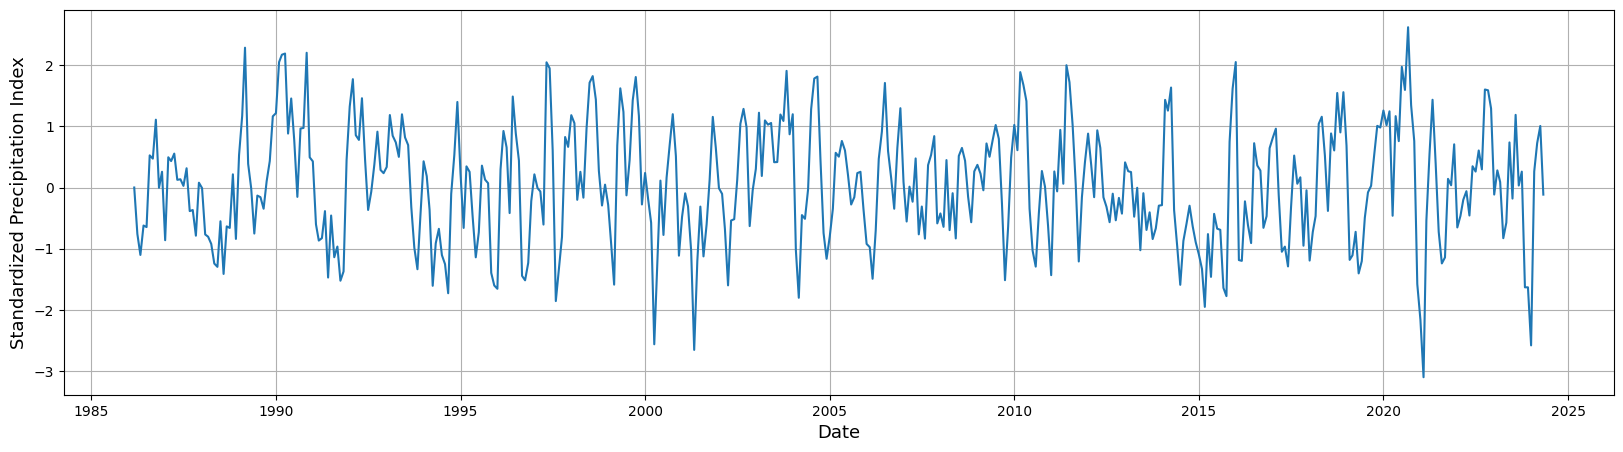

In [23]:
# 월 표준 강수 지수를 시각화
plt.figure(figsize=(20, 5)) #plot의 가로축을 20인치, 세로축을 5인치로 설정

#표준 강수지수
plt.plot(raw_data['SPI-3']) #raw_data의 'SPI-3'열을 플로팅
plt.grid()  #plot에 격자를 추가

#가로, 세로축 제목 설정
plt.ylabel('Standardized Precipitation Index', fontsize=13)
plt.xlabel('Date', fontsize=13)

#출력
plt.show()

In [24]:
# 월 표준 강수 지수 기초 통계량
raw_data['SPI-3'].describe()

count    459.000000
mean       0.039987
std        0.956764
min       -3.104000
25%       -0.643500
50%        0.033000
75%        0.706000
max        2.623000
Name: SPI-3, dtype: float64

### 월 합 강수량 시각화

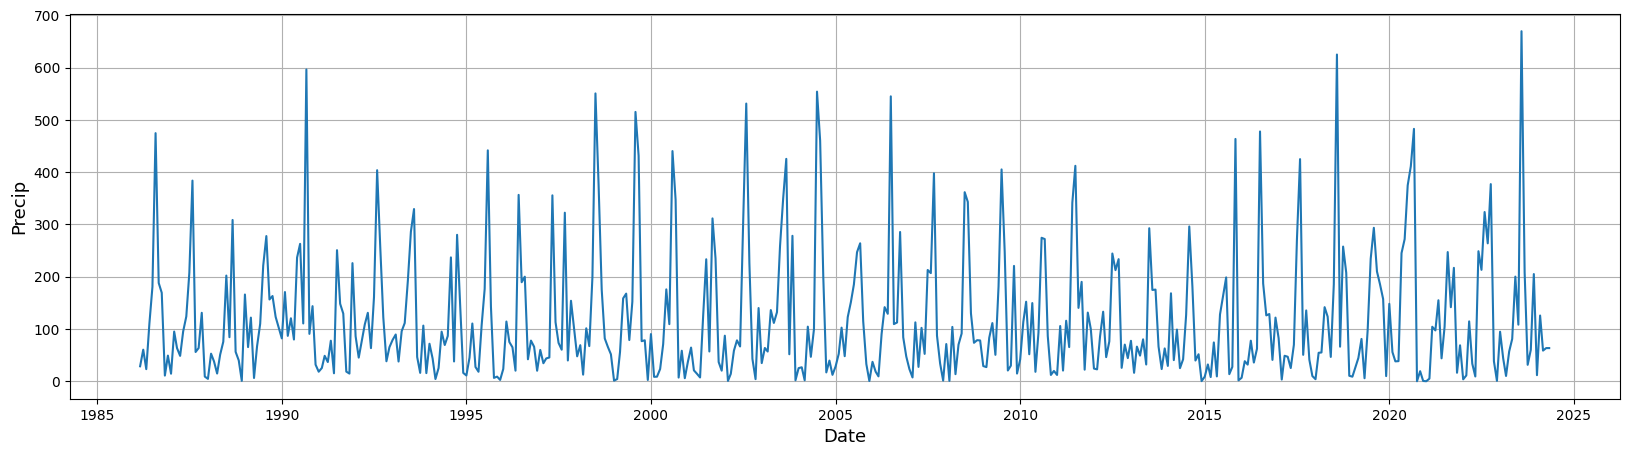

In [25]:
#월합강수량을 시각화
plt.figure(figsize=(20, 5)) #plot의 가로축을 20인치, 세로축을 5인치로 설정

#월합강수량
plt.plot(raw_data['Precip']) #raw_data의 'Precip'열을 플로팅
plt.grid()  #plot에 격자를 추가

#가로, 세로축 제목 설정
plt.ylabel('Precip', fontsize=13)
plt.xlabel('Date', fontsize=13)

#출력
plt.show()

In [26]:
# 월 합 강수량 기초통계량
raw_data['Precip'].describe()

count    459.000000
mean     118.185621
std      121.647645
min        0.000000
25%       34.150000
50%       77.500000
75%      159.750000
max      669.600000
Name: Precip, dtype: float64

### 월 평균기온 시각화

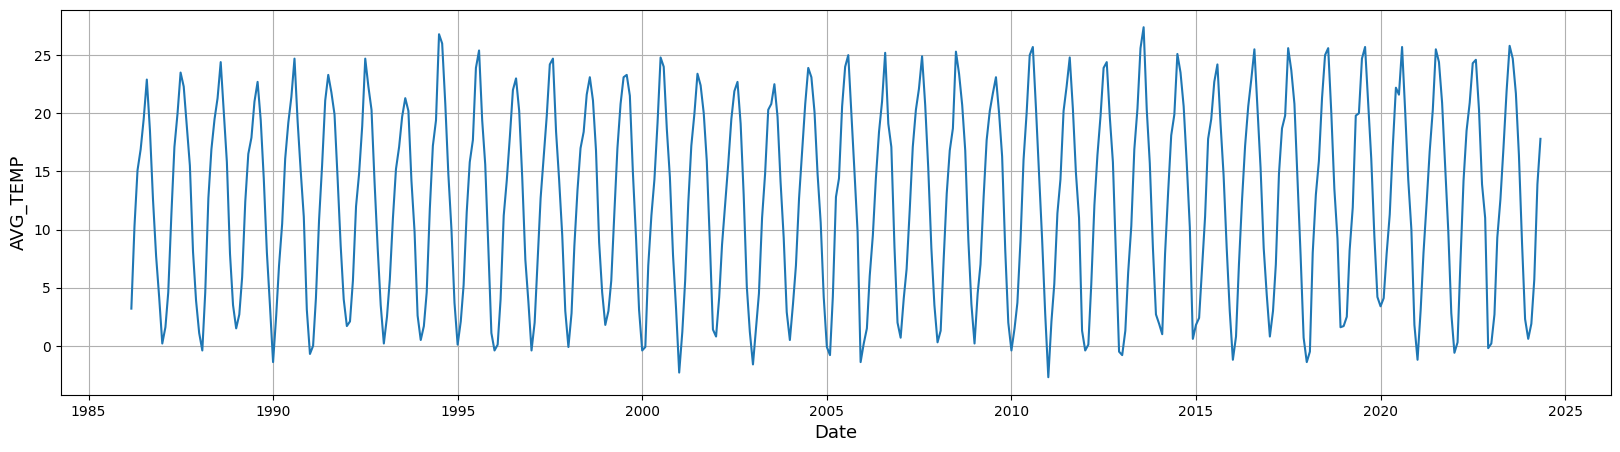

In [27]:
#월 평균기온을 시각화
plt.figure(figsize=(20, 5)) #plot의 가로축을 20인치, 세로축을 5인치로 설정

#월합강수량
plt.plot(raw_data['AVG_TEMP']) #raw_data의 'AVG_TEMP'열을 플로팅
plt.grid()  #plot에 격자를 추가

#가로, 세로축 제목 설정
plt.ylabel('AVG_TEMP', fontsize=13)
plt.xlabel('Date', fontsize=13)

#출력
plt.show()

In [28]:
# 월 평균기온 기초 통계량
raw_data['AVG_TEMP'].describe()

count    459.000000
mean      12.509368
std        8.254491
min       -2.700000
25%        4.200000
50%       13.500000
75%       20.000000
max       27.400000
Name: AVG_TEMP, dtype: float64

### 월 상대습도 시각화

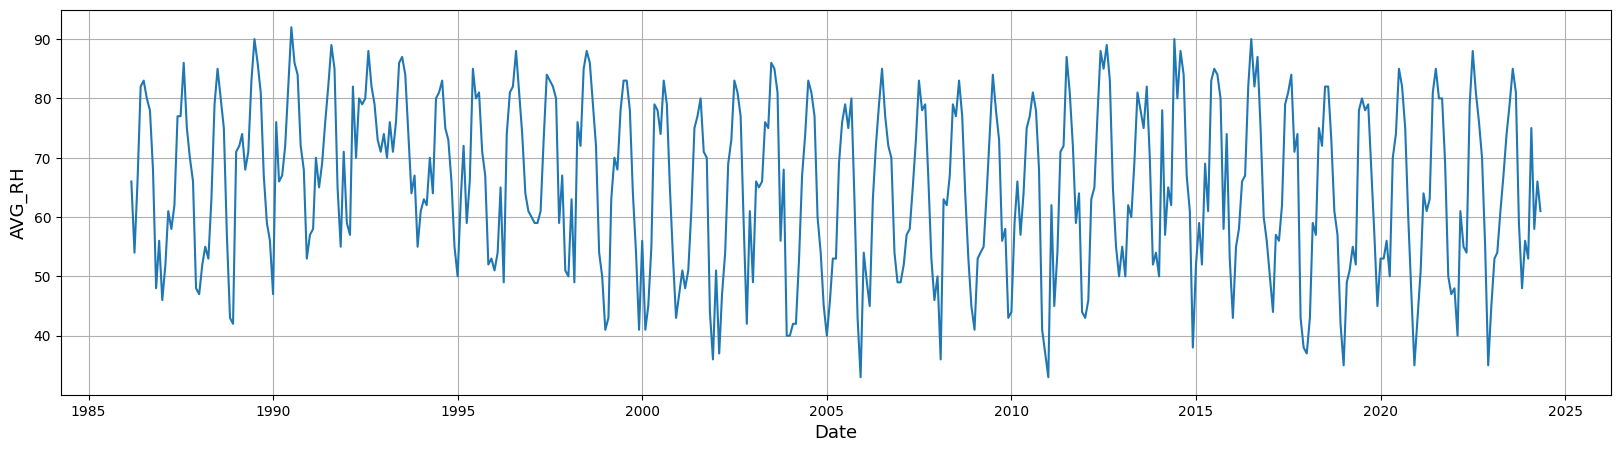

In [29]:
plt.figure(figsize=(20, 5)) #plot의 가로축을 20인치, 세로축을 5인치로 설정

plt.plot(raw_data['AVG_RH']) #raw_data의 'AVG_RH'열을 플로팅
plt.grid()  #plot에 격자를 추가

#가로, 세로축 제목 설정
plt.ylabel('AVG_RH', fontsize=13)
plt.xlabel('Date', fontsize=13)

#출력
plt.show()

In [30]:
# 월 상대습도 기초 통계량
raw_data['AVG_RH'].describe()

count    459.000000
mean      65.259259
std       14.069086
min       33.000000
25%       54.000000
50%       66.000000
75%       78.000000
max       92.000000
Name: AVG_RH, dtype: float64

### 상관관계행렬 시각화

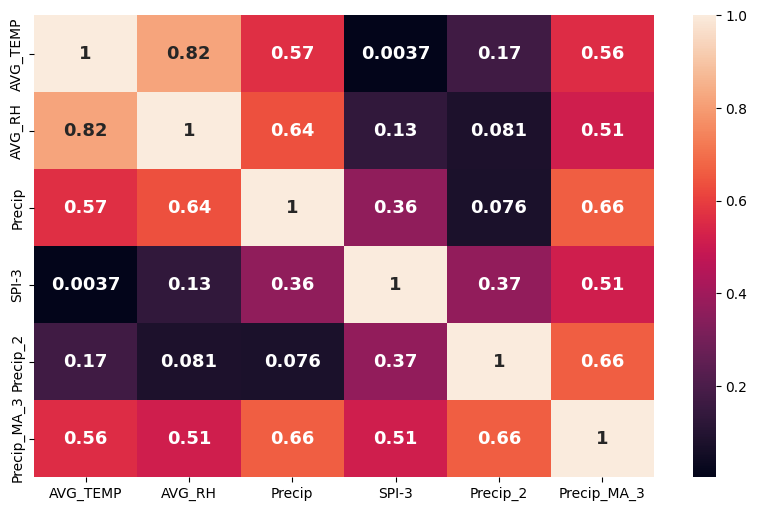

In [31]:
#상관분석 시각화
plt.figure(figsize=(10, 6)) #plot의 가로축을 10인치, 세로축을 6인치로 설정

#seabron라이브러리의 heapmap함수 사용해서 상관계수행렬을 시각화. 첫인자로 데이터프레임, 두번째 인자로 셀 값의 표현 유무, 세번쨰 인자로 표현시 폰트설정을 받음.
#dataFrame형의 내장함수 .corr()를 사용해 상관계수행렬을 heatmap함수로 전달.
sns.heatmap(raw_data.corr(), annot=True, annot_kws={'fontsize' : 13, 'fontweight' : 'bold'})

#출력
plt.show()

#출력결과 알고자 하는 변수 SPI-3와 상관관계가 높은 독립변수는 Precip, Precip_2, Precip_MA_3로 확인할 수 있음. 이때 Precip_2, Precip_MA_3는 Precip을 이용해 만든 변수이므로 당연히 다중공선성이 존재함.

In [99]:
# VIF 계산
from statsmodels.stats.outliers_influence import variance_inflation_factor

#VIF지수를 확인하기 위해 위에서 종속변수에 유의미하다고 판단한 독립변수만으로 데이터프레임을 생성
features = raw_data[['Precip_MA_3', 'Precip_2', 'AVG_RH']]

#VIF지수를 담을 데이터프레임을 생성
vif_data = pd.DataFrame()

#Feature열에는 독립변수의 이름을 담음
vif_data['Feature'] = features.columns

#VIF열에는 해당 독립변수의 VIF지수를 담음
vif_data['VIF'] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

#VIF지수를 확인
vif_data

#VIF지수가 높지만 Precip_2, Precip_MA_3열은 Precip열을 참조해 만든 열이므로 부적합하다고 판단하지 않음. Precip열은 이미 본인을 참조한 Precip_2, Precip_MA_3열이 있으므로 사용시 다중공선성이 너무 높아짐. 따라서 사용치 않음

,Feature,VIF
0,Precip_MA_3,6.782731
1,Precip_2,3.512317
2,AVG_RH,3.758089


# 3. Randomforest 예측

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler  # sklearn.preprocessing 라이브러리에서 스케일링을 하기 위해 사용하는 MinMaxScaler함수만 import
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

### test_date(2012-01-01)를 기준으로 train, test data 분리

In [108]:
# 독립변수
X = raw_data[['Precip_2', 'Precip_MA_3', 'AVG_RH']]

# 종속변수
target = 'SPI-3'
    
# 출력 데이터(raw_data데이터프레임의 target열('SPI-3')만 복사)
y = raw_data[[target]]
 
# train, test 분리
test_date = pd.to_datetime('2011-12-31') #비교연산자를 통해 데이터를 분리하기 위해 기준이 되는 날짜(2012-12-31)를 date형으로 생성(index가 date형이니까)

#기준이 되는 날짜(test_date)를 기반으로 test_date 이전의 데이터들은 train에 이후의 데이터들은 test에 저장
x_train = X.loc[X.index <= test_date, :] 
y_train = y.loc[y.index <= test_date, :]
 
x_test = X.loc[X.index > test_date, :]
y_test = y.loc[y.index > test_date, :]

### 스케일러 적용

In [119]:
#MinMaxScaler를 사용하여 데이터를 스케일링. 스케일링을 하는 이유는 모델의 성능을 향상시키고, 훈련 과정에서의 수렴 속도를 높이기 위해 사용.
scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
 
# train 데이터만 가지고 scaler fitting, 스케일러를 데이터에 맞춰 피팅시키는 과정
scaler.fit(x_train)
y_scaler.fit(y_train)
 
# Train 데이터 스케일러 적용
x_train_scaled = scaler.transform(x_train)
y_train_scaled = y_scaler.transform(y_train)
 
# Test 데이터 스케일러 적용, train데이터로 fitting한 scaler를 사용하기에 test데이터가 train데이터의 scale에 맞춰 변환됨.
x_test_scaled = scaler.transform(x_test)
y_test_scaled = y_scaler.transform(y_test)

print("scaling 전")
print(x_train)
print("scailing 후")
print(x_train_scaled)

scaling 전
            Precip_2  Precip_MA_3  AVG_RH
일시                                       
1986-03-01      58.3        112.3      66
1986-04-01      25.4        114.4      54
1986-05-01      28.6        112.1      66
1986-06-01      60.4        194.0      82
1986-07-01      23.1        314.3      83
...              ...          ...     ...
2011-08-01     341.5        893.9      81
2011-09-01     412.1        742.5      72
2011-10-01     140.3        352.5      59
2011-11-01     190.1        343.5      64
2011-12-01      22.1        253.1      44

[310 rows x 3 columns]
scailing 후
[[9.71476510e-02 7.90507228e-02 5.59322034e-01]
 [4.19463087e-02 8.08055486e-02 3.55932203e-01]
 [4.73154362e-02 7.88835966e-02 5.59322034e-01]
 [1.00671141e-01 1.47321802e-01 8.30508475e-01]
 [3.80872483e-02 2.47848249e-01 8.47457627e-01]
 [1.84731544e-01 6.25135790e-01 7.96610169e-01]
 [3.02516779e-01 6.89897217e-01 7.62711864e-01]
 [7.95637584e-01 6.80287457e-01 5.93220339e-01]
 [3.14765101e-01 2.927216

### train, test 데이터 저장

In [110]:
# 입력 데이터 저장 (Train)
#x_train과 y_train dataframe을 열기준으로 결합
Train_data = pd.concat([x_train, y_train], axis=1)
#read_csv와 마찬가지로 첫 매개변수로 경로를 받고 나머지 매개변수에서 옵션을 받음(옵션은 설정안하면 default로 적용). 해당 줄에서는 Train_data DataFrame을 utf-8-sig방식으로 인코딩하여 csv형식으로 저장.
Train_data.to_csv('./2_데이터셋/2_입력_데이터/Input_Train.csv', encoding='utf-8-sig')

# 입력 데이터 저장 (Test)
Test_data = pd.concat([x_test, y_test], axis=1)
Test_data.to_csv('./2_데이터셋/2_입력_데이터/Input_Test.csv', encoding='utf-8-sig')

### 모델 생성 및 저장

In [111]:
# 랜덤 프레스트 알고리즘을 사용하여 회귀 문제를 해결하는 RandomForestRegressor 모델을 생성. 
# 랜덤 포레스트 알고리즘이란 간단하게 말해서 여러 개의 의사결정트리가 내놓는 답을 조합하여 최종예측결과를 결정하는 방식.
# 의사결정트리는 그리디 알고리즘을 통해 답을 내놓고 랜덤포레스트 방식은 의사결정나무에 배깅이라는 앙상블 학습을 적용한 방식. 
model = RandomForestRegressor()

#train데이터로 모델을 학습시킴
model.fit(x_train_scaled, y_train_scaled)

# 훈련된 모델 저장
import pickle
with open(f'./3_머신러닝_모델/{target}_model.pickle', 'wb') as fw:  #쓰기모드로 {target}_model.pickle 파일을 저장하는 버퍼? fw를 생성.(target은 위에서 'SPI-3'로 사전에 정의)
    pickle.dump(model, fw)  #pickle 라이브러리의 dump함수를 통해 저장.첫 매개변수는 저장할 변수, 두번째 매개변수는 쓰기모드로 생성한 버퍼?를 받음

# 4. 예측 결과 시각화

### train 데이터 평가

RMSE :  0.28384473482476635
MAE :  0.2066255483870967
R2 :  0.9075271395436001


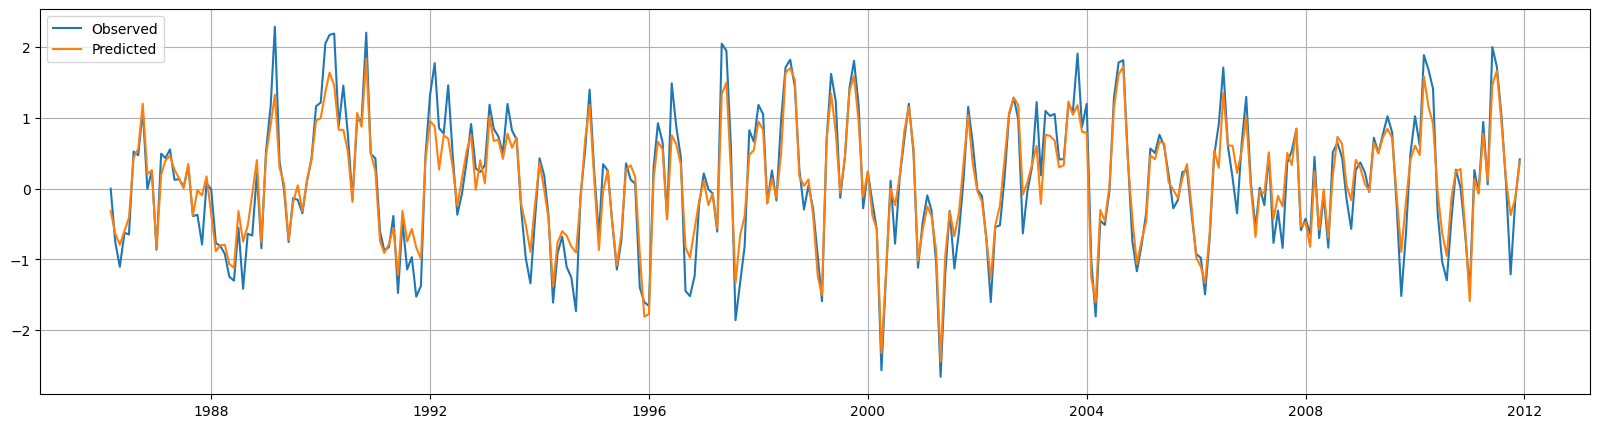

In [112]:
y_pred = model.predict(x_train_scaled)  #모델의 predict함수를 통해 train데이터로 예측을 실시
#reshape는 배열의 차원을 변경해주는 함수. 첫 인자에 행의 개수, 두번째 인자에 열의 개수를 받음. '-1'을 사용하면 배열의 다른 차원 크기를 자동으로 계산. 해당 줄에서는 n(data의 크기) x 1크기의 배열로 변경시켜줌.
y_pred = np.array(y_pred).reshape(-1, 1)

#inverse_transform함수는 스케일링된 예측결과를 원래의 데이터 스케일로 변환
y_pred_tr = y_scaler.inverse_transform(y_pred)
 
print('MSE : ', mean_squared_error(y_train, y_pred_tr)) #sklearn.metrics의 mse함수를 통해 예측된 값(y_pred_tr)과 실제 값(y_train)사이의 평균 오차 제곱(MSE)을 계산하고 출력(두 값간의 차이가 클 수록 큼)
print('MAE : ', mean_absolute_error(y_train, y_pred_tr)) #sklearn.metrics의 mae함수를 통해 예측된 값(y_pred_tr)과 실제 값(y_train)사이의 평균 절대 오차(MAE)를 계산하고 출력(낮을수록 예측이 정확함)
print('R2 : ', r2_score(y_train, y_pred_tr)) #sklearn.metrics의 r2_score함수를 통해 결정계수를 계산하고 출력(1에 가까울수록 좋은 모델)

# Train 데이터 예측 결과 시각화
plt.figure(figsize=(20, 5)) #plot를 가로 20인치, 세로 5인치로 변경

#예측된 값과 실제 값을 출력하기 위해 길이를 저장(개인적으로 idx를 아예 안넣고 [:]로 해도 그냥 돌아가지는데 왜 넣는지를 모르겠음)
idx = len(y_train)  
plt.plot(y_train.index[-idx:], y_train[-idx:], label = 'Observed')
plt.plot(y_train.index[-idx:], y_pred_tr, label = 'Predicted')

plt.legend() #범례를 추가
plt.grid() #격자(눈금)를 추가
plt.show()

# Train 데이터 예측 결과
y_pred_tr = pd.DataFrame(data = y_pred_tr, index = y_train.index, columns = ['Predicted'])

# y_train 데이터와 하나의 데이터프레임 만들기
y_pred_tr['Observed'] = y_train.values

### test 데이터 평가

MSE :  0.48710232210134197
MAE :  0.5147007382550335
R2 :  0.5064271303288015


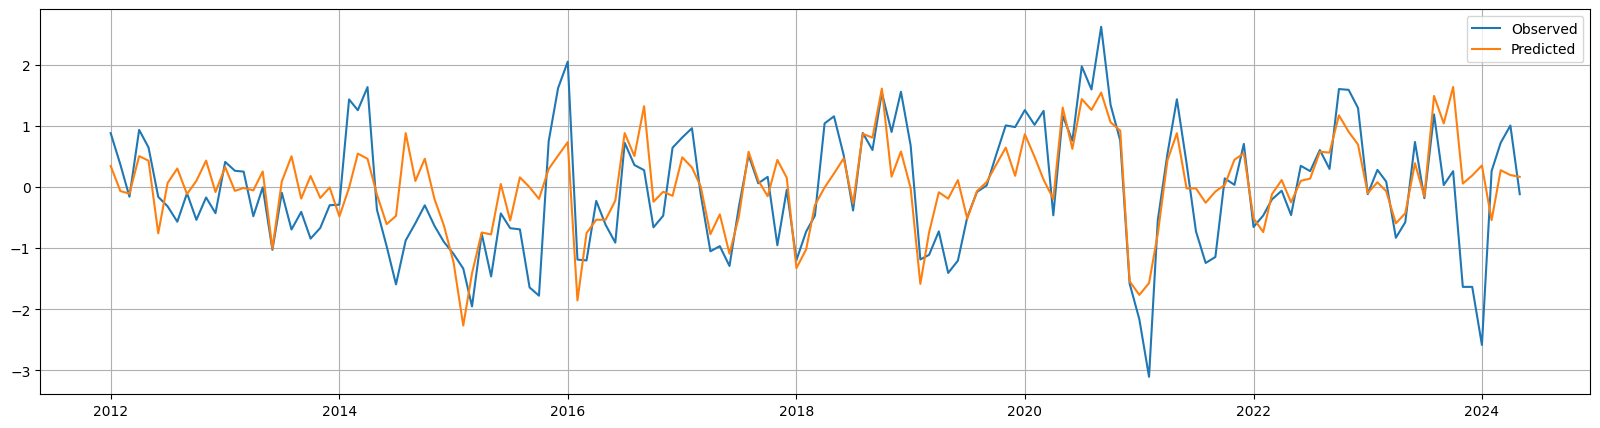

In [114]:
#위에서 train데이터로 모델을 평가하는 코드를 데이터만 test데이터로 바꾼 코드
y_pred = model.predict(x_test_scaled)
y_pred = np.array(y_pred).reshape(-1, 1)

# Test 데이터 예측 결과
y_pred_te = y_scaler.inverse_transform(y_pred)
 
print('MSE : ', mean_squared_error(y_test, y_pred_te))
print('MAE : ', mean_absolute_error(y_test, y_pred_te))
print('R2 : ', r2_score(y_test, y_pred_te))

# Test 데이터 예측 결과 시각화
plt.figure(figsize=(20, 5))

idx=len(y_test)
plt.plot(y_test.index[-idx:], y_test[-idx:], label='Observed')
plt.plot(y_test.index[-idx:], y_pred_te, label='Predicted')
plt.legend()
plt.grid()
plt.show()

# Test 데이터 예측 결과
y_pred_te = pd.DataFrame(data = y_pred_te, index = y_test.index, columns = ['Predicted'])

# y_test 데이터와 하나의 데이터프레임 만들기
y_pred_te['Observed'] = y_test.values

# 5. 예측 결과 저장

In [115]:
# Train, Test 결과 저장
#to_csv함수는 데이터 프레임을 csv로 저장하는 함수로 read_csv와 마찬가지로 첫 매개변수로 경로를 받고 나머지는 옵션을 받는다. 옵션은 안받으면 default로 설정되고 경로는 반드시 지정해줘야한다.
y_pred_tr.to_csv('./2_데이터셋/3_출력_데이터_(예측_결과)/Train 예측 결과.csv', encoding='utf-8-sig')
y_pred_te.to_csv('./2_데이터셋/3_출력_데이터_(예측_결과)/Test 예측 결과.csv', encoding='utf-8-sig')